In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

from sklearn.metrics import RocCurveDisplay
from sklearn import preprocessing

from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report


In [226]:
ml_df = pd.read_csv(
    "../Dataset/dataset_filled_missing.csv")
ml_df.drop(["Unnamed: 0"], axis=1, inplace=True)
ml_df['Id'] = ['condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'control', 'control',
               'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control']
ml_df


,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,5days_sleep_time_activity,5days_day_time_activity,Id
0,2,37,2,2,2,8,1,2,19,10693.6,228824.0,condition
1,2,42,1,2,2,8,2,2,24,48771.2,239278.2,condition
2,1,47,2,2,2,8,2,2,24,43211.0,317726.0,condition
3,2,27,2,2,2,13,1,1,20,56892.4,194298.2,condition
4,2,52,2,2,2,13,2,2,26,31303.8,200302.2,condition
5,1,37,2,2,2,8,1,2,18,26634.2,240767.8,condition
6,1,22,1,2,2,13,2,1,24,61643.6,335598.2,condition
7,2,27,2,2,2,13,1,2,20,34374.2,284320.6,condition
8,2,47,1,2,2,8,1,2,26,42992.0,203120.0,condition
9,2,47,2,2,2,8,1,2,28,25811.0,482765.0,condition


In [227]:
import math
from matplotlib.colors import ListedColormap

In [228]:
x = []
y = []
count = 0
count_g = 0
count_o = 0

for i in range(len(ml_df["Id"])):

    if ml_df["Id"][i] == "condition":
        x.append([0])
        y.append([ml_df["5days_sleep_time_activity"][i],
                  ml_df["5days_day_time_activity"][i], ml_df["age"][i], ml_df["gender"][i], ml_df["afftype"][i],
                  ml_df["melanch"][i], ml_df["edu"][i], ml_df["work"][i], ml_df["madrs1"][i], ml_df["marriage"][i]])

    elif ml_df["Id"][i] == "control":
        x.append([1])
        y.append([ml_df["5days_sleep_time_activity"][i],
                  ml_df["5days_day_time_activity"][i], ml_df["age"][i], ml_df["gender"][i], ml_df["afftype"][i],
                  ml_df["melanch"][i], ml_df["edu"][i], ml_df["work"][i], ml_df["madrs1"][i], ml_df["marriage"][i]])


print(f'Select: {len(y)} set')
y = np.array(y)
x = np.array(x)

print(y)
print(x)


Select: 55 set
[[1.069360e+04 2.288240e+05 3.700000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 8.000000e+00 2.000000e+00 1.900000e+01 1.000000e+00]
 [4.877120e+04 2.392782e+05 4.200000e+01 2.000000e+00 1.000000e+00
  2.000000e+00 8.000000e+00 2.000000e+00 2.400000e+01 2.000000e+00]
 [4.321100e+04 3.177260e+05 4.700000e+01 1.000000e+00 2.000000e+00
  2.000000e+00 8.000000e+00 2.000000e+00 2.400000e+01 2.000000e+00]
 [5.689240e+04 1.942982e+05 2.700000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 1.300000e+01 1.000000e+00 2.000000e+01 1.000000e+00]
 [3.130380e+04 2.003022e+05 5.200000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 1.300000e+01 2.000000e+00 2.600000e+01 2.000000e+00]
 [2.663420e+04 2.407678e+05 3.700000e+01 1.000000e+00 2.000000e+00
  2.000000e+00 8.000000e+00 2.000000e+00 1.800000e+01 1.000000e+00]
 [6.164360e+04 3.355982e+05 2.200000e+01 1.000000e+00 1.000000e+00
  2.000000e+00 1.300000e+01 1.000000e+00 2.400000e+01 2.000000e+00]
 [3.437420e+04 2.843206e+05 2.700000e+01

In [229]:
# # Add noisy features
# random_state = np.random.RandomState(0)


# # Train Test split
# x_train, x_test, y_train, y_test = train_test_split(
#     x, y, test_size=0.2, random_state=random_state)


In [230]:
# print(x_train)
# print(y_train)

In [231]:
def classifier_modeling():
    optimizer = keras.optimizers.Adam(lr=0.04286159637668319)
    model = Sequential()
    model.add(Dense(75, input_shape=(10,), activation='relu'))
    model.add(Dropout(rate=0.07511350278007067))
    model.add(BatchNormalization())
    model.add(Dense(40, activation='softsign'))
    model.add(Dropout(rate=0.40307958211771))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer, metrics=['accuracy'])
    return model


In [232]:
# #testing model
# model = Sequential()
# model.add(Dense(115, input_shape=(11,), activation='sigmoid'))
# model.add(Dense(55, activation='sigmoid'))
# model.add(Dense(85, activation='sigmoid'))
# model.add(Dense(2, activation='selu'))
# model.compile(loss='binary_crossentropy',
#               optimizer='Adamax', metrics=['accuracy'])

# le = preprocessing.LabelEncoder()
# le.fit(x_train)
# x_train = le.transform(x_train)
# x_train = keras.utils.to_categorical(x_train)

# model.fit(y_train, x_train, validation_split=0.2, epochs=50, batch_size=2)


Automatically created module for IPython interactive environment
[[4.877120e+04 2.392782e+05 4.200000e+01 2.000000e+00 1.000000e+00
  2.000000e+00 8.000000e+00 2.000000e+00 2.400000e+01 2.000000e+00]
 [4.321100e+04 3.177260e+05 4.700000e+01 1.000000e+00 2.000000e+00
  2.000000e+00 8.000000e+00 2.000000e+00 2.400000e+01 2.000000e+00]
 [5.689240e+04 1.942982e+05 2.700000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 1.300000e+01 1.000000e+00 2.000000e+01 1.000000e+00]
 [3.130380e+04 2.003022e+05 5.200000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 1.300000e+01 2.000000e+00 2.600000e+01 2.000000e+00]
 [6.164360e+04 3.355982e+05 2.200000e+01 1.000000e+00 1.000000e+00
  2.000000e+00 1.300000e+01 1.000000e+00 2.400000e+01 2.000000e+00]
 [3.437420e+04 2.843206e+05 2.700000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 1.300000e+01 2.000000e+00 2.000000e+01 1.000000e+00]
 [4.299200e+04 2.031200e+05 4.700000e+01 2.000000e+00 1.000000e+00
  2.000000e+00 8.000000e+00 2.000000e+00 2.600000e+01 1.00

C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(na

3/3 [==============================] - 1s 78ms/step - loss: 0.8525 - accuracy: 0.4286 - val_loss: 0.1136 - val_accuracy: 1.0000
Epoch 2/89
3/3 [==============================] - 0s 13ms/step - loss: 0.8973 - accuracy: 0.5714 - val_loss: 0.4105 - val_accuracy: 0.8571
Epoch 3/89
3/3 [==============================] - 0s 14ms/step - loss: 0.7390 - accuracy: 0.6786 - val_loss: 0.8635 - val_accuracy: 0.0000e+00
Epoch 4/89
3/3 [==============================] - 0s 13ms/step - loss: 0.6461 - accuracy: 0.6429 - val_loss: 0.9017 - val_accuracy: 0.0000e+00
Epoch 5/89
3/3 [==============================] - 0s 15ms/step - loss: 0.6876 - accuracy: 0.5714 - val_loss: 0.8523 - val_accuracy: 0.0000e+00
Epoch 6/89
3/3 [==============================] - 0s 14ms/step - loss: 0.6432 - accuracy: 0.6429 - val_loss: 0.5764 - val_accuracy: 0.8571
Epoch 7/89
3/3 [==============================] - 0s 14ms/step - loss: 0.7136 - accuracy: 0.6429 - val_loss: 0.4264 - val_accuracy: 0.8571
Epoch 8/89
3/3 [==========

C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(na

3/3 [==============================] - 1s 107ms/step - loss: 0.8246 - accuracy: 0.6786 - val_loss: 0.2189 - val_accuracy: 0.8571
Epoch 2/89
3/3 [==============================] - 0s 17ms/step - loss: 0.7105 - accuracy: 0.6071 - val_loss: 0.7066 - val_accuracy: 0.7143
Epoch 3/89
3/3 [==============================] - 0s 20ms/step - loss: 0.7052 - accuracy: 0.6786 - val_loss: 0.9789 - val_accuracy: 0.0000e+00
Epoch 4/89
3/3 [==============================] - 0s 20ms/step - loss: 0.6697 - accuracy: 0.5714 - val_loss: 0.7779 - val_accuracy: 0.0000e+00
Epoch 5/89
3/3 [==============================] - 0s 19ms/step - loss: 0.6622 - accuracy: 0.6786 - val_loss: 0.5519 - val_accuracy: 1.0000
Epoch 6/89
3/3 [==============================] - 0s 15ms/step - loss: 0.6774 - accuracy: 0.6786 - val_loss: 0.3580 - val_accuracy: 1.0000
Epoch 7/89
3/3 [==============================] - 0s 17ms/step - loss: 0.7106 - accuracy: 0.6786 - val_loss: 0.2357 - val_accuracy: 1.0000
Epoch 8/89
3/3 [=============

C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(na

3/3 [==============================] - 1s 88ms/step - loss: 0.9134 - accuracy: 0.5357 - val_loss: 0.1208 - val_accuracy: 1.0000
Epoch 2/89
3/3 [==============================] - 0s 19ms/step - loss: 0.6747 - accuracy: 0.7143 - val_loss: 0.2328 - val_accuracy: 1.0000
Epoch 3/89
3/3 [==============================] - 0s 16ms/step - loss: 0.5537 - accuracy: 0.7143 - val_loss: 0.2123 - val_accuracy: 1.0000
Epoch 4/89
3/3 [==============================] - 0s 18ms/step - loss: 0.5621 - accuracy: 0.7143 - val_loss: 0.2656 - val_accuracy: 1.0000
Epoch 5/89
3/3 [==============================] - 0s 16ms/step - loss: 0.6595 - accuracy: 0.6786 - val_loss: 0.4498 - val_accuracy: 0.8571
Epoch 6/89
3/3 [==============================] - 0s 17ms/step - loss: 0.5684 - accuracy: 0.7500 - val_loss: 0.4222 - val_accuracy: 0.8571
Epoch 7/89
3/3 [==============================] - 0s 15ms/step - loss: 0.5174 - accuracy: 0.7857 - val_loss: 0.2648 - val_accuracy: 1.0000
Epoch 8/89
3/3 [======================

C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(na

3/3 [==============================] - 1s 99ms/step - loss: 0.8090 - accuracy: 0.5714 - val_loss: 0.0952 - val_accuracy: 1.0000
Epoch 2/89
3/3 [==============================] - 0s 18ms/step - loss: 0.4375 - accuracy: 0.8571 - val_loss: 0.2572 - val_accuracy: 1.0000
Epoch 3/89
3/3 [==============================] - 0s 17ms/step - loss: 0.5432 - accuracy: 0.7143 - val_loss: 0.8139 - val_accuracy: 0.2857
Epoch 4/89
3/3 [==============================] - 0s 15ms/step - loss: 0.6005 - accuracy: 0.7500 - val_loss: 0.5592 - val_accuracy: 0.8571
Epoch 5/89
3/3 [==============================] - 0s 16ms/step - loss: 0.6017 - accuracy: 0.7500 - val_loss: 0.2194 - val_accuracy: 1.0000
Epoch 6/89
3/3 [==============================] - 0s 16ms/step - loss: 0.5647 - accuracy: 0.6786 - val_loss: 0.2377 - val_accuracy: 1.0000
Epoch 7/89
3/3 [==============================] - 0s 17ms/step - loss: 0.5978 - accuracy: 0.7143 - val_loss: 0.2413 - val_accuracy: 1.0000
Epoch 8/89
3/3 [======================

C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(na

3/3 [==============================] - 1s 97ms/step - loss: 0.7182 - accuracy: 0.7500 - val_loss: 0.6782 - val_accuracy: 1.0000
Epoch 2/89
3/3 [==============================] - 0s 16ms/step - loss: 0.5482 - accuracy: 0.7500 - val_loss: 0.6192 - val_accuracy: 0.8750
Epoch 3/89
3/3 [==============================] - 0s 18ms/step - loss: 0.6168 - accuracy: 0.7500 - val_loss: 0.2147 - val_accuracy: 1.0000
Epoch 4/89
3/3 [==============================] - 0s 14ms/step - loss: 0.5800 - accuracy: 0.7857 - val_loss: 0.1636 - val_accuracy: 1.0000
Epoch 5/89
3/3 [==============================] - 0s 19ms/step - loss: 0.6041 - accuracy: 0.6786 - val_loss: 0.2152 - val_accuracy: 1.0000
Epoch 6/89
3/3 [==============================] - 0s 20ms/step - loss: 0.4151 - accuracy: 0.7857 - val_loss: 0.3507 - val_accuracy: 1.0000
Epoch 7/89
3/3 [==============================] - 0s 15ms/step - loss: 0.4577 - accuracy: 0.7857 - val_loss: 0.3207 - val_accuracy: 1.0000
Epoch 8/89
3/3 [======================

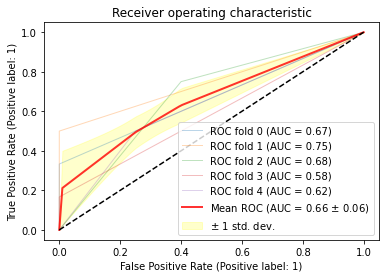

In [233]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
import pickle
import matplotlib.pyplot as plt
print(__doc__)

# Add noisy features
random_state = np.random.RandomState(0)

# Train Test split
X_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=random_state)

# print(X_train, y_train)
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)

history = []

tprs = []
aucs = []

x_train_best = []
y_train_best = []

mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

x_train = np.argmax(X_train, axis=1) 

for i, (train, val) in enumerate(cv.split(y_train, x_train)):

    X_train, X_val = y[train], y[val]
    y_train, y_val = x[train], x[val]
    print(X_train, y_train)

    le = preprocessing.LabelEncoder()
    le.fit(y_train)
    y_train = le.transform(y_train)
    y_train = keras.utils.to_categorical(y_train)

    
    classifier = classifier_modeling()

    x_train_best.append(X_train)
    y_train_best.append(y_train)

    # Fit model
    history = classifier.fit(X_train, y_train, validation_split=0.2,
                   epochs=89, batch_size=12)

    # Save model
    #with open('model\\ann_wofill', 'wb') as f:
    #    pickle.dump(classifier, f)

    # Predict
    predict = classifier.predict(X_val)
    predict = np.argmax(predict, axis=1)

    viz = RocCurveDisplay.from_predictions(y_val, predict, name='ROC fold {}'.format(i),
                           alpha=0.3, lw=1, ax=ax)                     
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="r",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="yellow",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig(
   'graph\\ann_wofill_graph.jpg')
plt.show()




In [234]:
#findind best x_train y_train

index_max_auc = aucs.index(max(aucs))
print(index_max_auc)
print(x_train_best[index_max_auc], y_train_best[index_max_auc])

1
[[1.069360e+04 2.288240e+05 3.700000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 8.000000e+00 2.000000e+00 1.900000e+01 1.000000e+00]
 [4.877120e+04 2.392782e+05 4.200000e+01 2.000000e+00 1.000000e+00
  2.000000e+00 8.000000e+00 2.000000e+00 2.400000e+01 2.000000e+00]
 [4.321100e+04 3.177260e+05 4.700000e+01 1.000000e+00 2.000000e+00
  2.000000e+00 8.000000e+00 2.000000e+00 2.400000e+01 2.000000e+00]
 [3.130380e+04 2.003022e+05 5.200000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 1.300000e+01 2.000000e+00 2.600000e+01 2.000000e+00]
 [2.663420e+04 2.407678e+05 3.700000e+01 1.000000e+00 2.000000e+00
  2.000000e+00 8.000000e+00 2.000000e+00 1.800000e+01 1.000000e+00]
 [3.437420e+04 2.843206e+05 2.700000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 1.300000e+01 2.000000e+00 2.000000e+01 1.000000e+00]
 [4.299200e+04 2.031200e+05 4.700000e+01 2.000000e+00 1.000000e+00
  2.000000e+00 8.000000e+00 2.000000e+00 2.600000e+01 1.000000e+00]
 [2.581100e+04 4.827650e+05 4.700000e+01 2.000000e+00

In [235]:
print(x_train_best)
print(y_train_best)


[array([[4.877120e+04, 2.392782e+05, 4.200000e+01, 2.000000e+00,
        1.000000e+00, 2.000000e+00, 8.000000e+00, 2.000000e+00,
        2.400000e+01, 2.000000e+00],
       [4.321100e+04, 3.177260e+05, 4.700000e+01, 1.000000e+00,
        2.000000e+00, 2.000000e+00, 8.000000e+00, 2.000000e+00,
        2.400000e+01, 2.000000e+00],
       [5.689240e+04, 1.942982e+05, 2.700000e+01, 2.000000e+00,
        2.000000e+00, 2.000000e+00, 1.300000e+01, 1.000000e+00,
        2.000000e+01, 1.000000e+00],
       [3.130380e+04, 2.003022e+05, 5.200000e+01, 2.000000e+00,
        2.000000e+00, 2.000000e+00, 1.300000e+01, 2.000000e+00,
        2.600000e+01, 2.000000e+00],
       [6.164360e+04, 3.355982e+05, 2.200000e+01, 1.000000e+00,
        1.000000e+00, 2.000000e+00, 1.300000e+01, 1.000000e+00,
        2.400000e+01, 2.000000e+00],
       [3.437420e+04, 2.843206e+05, 2.700000e+01, 2.000000e+00,
        2.000000e+00, 2.000000e+00, 1.300000e+01, 2.000000e+00,
        2.000000e+01, 1.000000e+00],
       [4

In [236]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


classifier = classifier_modeling()

# Fit model
classifier.fit(x_train_best[index_max_auc], y_train_best[index_max_auc], validation_split=0.2,
               epochs=88, batch_size=12)
# Report
predict = classifier.predict(y_test)
predict = np.argmax(predict, axis=1)
# x_test = x_test[:,0]





Epoch 1/88


C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 109ms/step - loss: 0.9101 - accuracy: 0.5714 - val_loss: 0.1152 - val_accuracy: 1.0000
Epoch 2/88
3/3 [==============================] - 0s 25ms/step - loss: 0.7141 - accuracy: 0.6429 - val_loss: 0.3747 - val_accuracy: 1.0000
Epoch 3/88
3/3 [==============================] - 0s 25ms/step - loss: 0.6356 - accuracy: 0.6429 - val_loss: 0.7727 - val_accuracy: 0.0000e+00
Epoch 4/88
3/3 [==============================] - 0s 16ms/step - loss: 0.6232 - accuracy: 0.6786 - val_loss: 0.7369 - val_accuracy: 0.0000e+00
Epoch 5/88
3/3 [==============================] - 0s 18ms/step - loss: 0.7177 - accuracy: 0.5714 - val_loss: 0.6794 - val_accuracy: 1.0000
Epoch 6/88
3/3 [==============================] - 0s 16ms/step - loss: 0.7321 - accuracy: 0.6071 - val_loss: 0.7656 - val_accuracy: 0.0000e+00
Epoch 7/88
3/3 [==============================] - 0s 15ms/step - loss: 0.5172 - accuracy: 0.8214 - val_loss: 0.8312 - val_accuracy: 0.0000e+00
Epoch 8/88
3/3 [=====

[0 0 0 0 0 0 0 1 1 1 0]
[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]]
              precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           1       1.00      0.38      0.55         8

    accuracy                           0.55        11
   macro avg       0.69      0.69      0.55        11
weighted avg       0.83      0.55      0.55        11

Sensitivity :  1.0
Specificity :  0.375
Accuracy :  0.5454545454545454
Precision : 0.375
F1 Score : 0.545
                         non-depressed        depressed   
Actual non=depressed          3                0
Actual depressed              5                3


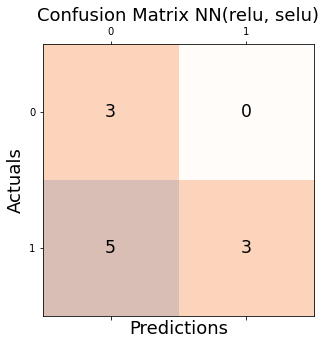

In [237]:
print(predict)
print(x_test)

print(classification_report(x_test, predict))

conf = confusion_matrix(x_test, predict)
sensitivity = conf[1, 1]/(conf[0, 1] + conf[1, 1])
specificity = conf[0, 0]/(conf[0, 0] + conf[1, 0])
acc = accuracy_score(predict, x_test)

print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)
print('Accuracy : ', acc)
print('Precision : %.3f' % precision_score(predict, x_test))
print('F1 Score : %.3f' % f1_score(predict, x_test))
print('                         non-depressed        depressed   ')
print('Actual non=depressed     %6d' %
      conf[0, 0] + "            %5d" % conf[0, 1])
print('Actual depressed         %6d' %
      conf[1, 0] + "            %5d" % conf[1, 1])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        ax.text(x=j, y=i, s=conf[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
# change by your output's activation function
plt.title('Confusion Matrix NN(relu, selu)', fontsize=18)
plt.savefig(
    'matrix\\ann_filled_matrix.jpg')
plt.show()


C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


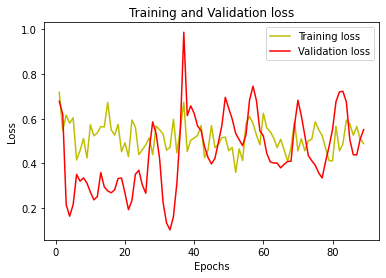

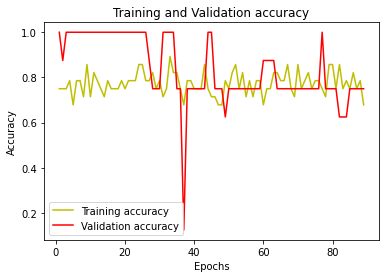

In [238]:
classifier = classifier_modeling()
# history = classifier.fit(X_train, y_train, validation_split=0.2 ,batch_size=25, epochs=150)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(
    'graph\\loss_ofit_graph.jpg')
plt.show()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(
    'graph\\auc_ofit_graph.jpg')
plt.show()
